# Investment Analysis Assignment

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

## Checkpoint 1: Data Cleaning 

In [2]:
#Load "companies" and "rounds2" Data into Pandas Dataframe from csv
companies = pd.read_csv("companies.csv",sep=",",encoding = "palmos")
rounds2 = pd.read_csv("rounds2.csv",sep=",",encoding = "palmos")

`I have loaded and performed data cleaning activity for 'sector mapping' csv within Checkpoint 4 to ensure continuity.`

In [3]:
rounds2.shape

(114949, 6)

In [4]:
companies.shape

(66368, 10)

-  I am going to use **permalink** in companies and **company_permalink** in rounds2 as unique key to compare both datasets.
-  First I will convert all the letters in the string to upper by **str.upper()** function

In [5]:
companies['permalink'] = companies['permalink'].str.upper()
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()

### <font color=blue>How many unique companies are present in rounds2?

-  I am using **nunique()** function to get the result.

In [6]:
rounds2['company_permalink'].nunique(dropna = True)

66368

### <font color=blue> How many unique companies are present in the companies file?

-  I am using **nunique()** function to get the result.

In [7]:
companies['permalink'].nunique(dropna = True)

66368

### <font color=blue>Are there any companies in the rounds2 file which are not  present in companies ?

-  I am using **isin()** function to check if any company in rounds2.csv is not there in companies.csv.
-  Then I am using **value_counts()** to get the count of resultant Boolean outcomes
-  Answer is **"NO"**

In [8]:
rounds2['company_permalink'].isin(companies['permalink']).value_counts()
#True = common
#False = different 

True    114949
Name: company_permalink, dtype: int64

### <font color=blue> Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

-  Using **merge()** function to merge the two dataframes.
-  By default the join is inner so not explicitly mentioning it in the code

In [9]:
master_frame = pd.merge(rounds2,companies,left_on = 'company_permalink',right_on = 'permalink')

In [10]:
master_frame.shape

(114949, 16)

### <font color=blue>Data Cleansing Activity

1.  **company_permalink** and **permalink** columns in **master_frame** dataframe contains the same information.
2.  So we can drop the **permalink** column from the master dataframe

In [11]:
master_frame = master_frame.drop(columns = ['permalink'])

In [12]:
master_frame.shape # Verify if the column is dropped - evident from change in shape from 16 to 15

(114949, 15)

3.  Now we will check the columns with Null or missing values.
4.  By using the **info()** function we can check which columns have Null or missing values.
5.  We will also check the data in terms of **'%'** of the overall missing values.

In [13]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [14]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

#### <font color=green> Key Conclusions are - 
-  As evident from the above table **funding_round_code** column has maximum at **72.91%** missing or NULL values,followed by **founded_at** column at **17.85%** and **raised_amount_usd** column at **17.39%** missing or NULL values.
-  **raised_amount_usd** is crucial for our further data analysis exercise,so we can't drop the column neither can we impute it with mean or median as this may introduce heavy bias.
-  **funding_round_code** and **founded_at** doesn't add significant value to the overall data analysis exercise;further it also is not advisable to impute these fields with computational values as this may introduce significant bias.So we will drop these 2 columns.

In [15]:
master_frame = master_frame.drop(columns = ['funding_round_code','founded_at'])

In [16]:
master_frame.shape # Verify if the column is dropped - evident from change in shape from 15 to 13

(114949, 13)

## Checkpoint 2: Funding Type Analysis

### <font color=blue>Find out representive funding amount for **'venture'**, **'angel'**,**'seed'** and **'private equity type'**

1 Group by **'funding_round_type'** column and calculate **mean** of **'raised_amount_usd'** column

In [17]:
pd.options.display.float_format = '{:.2f}'.format #Lets set the display for the results limited upto 2 decimal places
master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
post_ipo_debt           168704571.82
post_ipo_equity          82182493.87
secondary_market         79649630.10
private_equity           73308593.03
undisclosed              19242370.23
debt_financing           17043526.02
venture                  11748949.13
grant                     4300576.34
convertible_note          1453438.54
product_crowdfunding      1363131.07
angel                      958694.47
seed                       719818.00
equity_crowdfunding        538368.21
non_equity_assistance      411203.05
Name: raised_amount_usd, dtype: float64

### <font color=blue>Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

1.  Step 1-Creating a new DataFrame for only 4 Funding type

In [18]:
funding_roundtypes_frame=pd.DataFrame(master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                                                  (master_frame['funding_round_type'] == 'venture') | 
                                                  (master_frame['funding_round_type'] == 'seed') | 
                                                  (master_frame['funding_round_type'] == 'private_equity'), :].
                                groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False))
funding_roundtypes_frame.reset_index(inplace=True)
funding_roundtypes_frame.head()

,funding_round_type,raised_amount_usd
0,private_equity,73308593.03
1,venture,11748949.13
2,angel,958694.47
3,seed,719818.00


2.  Step 2 - Find the right **'funding_round_type'** sector to invest between 5 to 15 million USD

In [19]:
funding_roundtypes_frame.loc[(funding_roundtypes_frame['raised_amount_usd'] > 5000000.00) &
                        (funding_roundtypes_frame['raised_amount_usd'] < 15000000.00)]

,funding_round_type,raised_amount_usd
1,venture,11748949.13


#### As evident from the above table,Spark Funds should consider to invest between 5 to 15 million USD in **'Venture'** funding rounds 

### <font color=blue> Identify the investment type and for further analysis, filter the data so it only contains the chosen investment type.

-  Creating a dataframe named as ***'venture_funding'***

In [20]:
venture_funding = master_frame.loc[master_frame['funding_round_type'] == 'venture', :]

## Checkpoint 3: Country Analysis

1.  ### <font color=blue>Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2.  ### <font color=blue>For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received

**_Steps followed:_**
1.  To create a new dataframe **'top9'**,I am using the earlier created dataframe **'venture_funding'**.
2.  First,I am doing **groupby()** by **'country_code'** and then taking the sum of **'raised_amount_usd'**

In [21]:
top9 = pd.DataFrame(venture_funding.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False))
top9.reset_index(inplace=True) ## THIS IS REQUIRED FOR EASY PLOTTING OF BAR CHART FOR TOP 9 COUNTRIES
top9.head(n=9)

,country_code,raised_amount_usd
0,USA,422510842796.00
1,CHN,39835418773.00
2,GBR,20245627416.00
3,IND,14391858718.00
4,CAN,9583332317.00
5,FRA,7259536732.00
6,ISR,6907514579.00
7,DEU,6346959822.00
8,JPN,3363676611.00


### <font color=blue> Identify the top three English-speaking countries in the data frame top9

1.  From **'top9'** dataframe,we can conclude that **'USA,GBR and IND'** are the top 3 countries where English is an official language.This is based on the wiki link provided as part of the assignment -    
    **_https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language**

## Checkpoint 4: Sector Analysis 1

### <font color=blue>Extract the primary sector of each category list from the category_list column

**_Steps followed:_**
1.  Post discussion with the CEO it has been agreed that the first string before the **'|'** will be considered the primary sector.So,I am using split function to select the right value.
2.  I am also converting the values in the column to UPPER character which will help in future data analysis with other dataframes.

In [22]:
pd.set_option('mode.chained_assignment', None)
venture_funding.loc[:,'primary_sector'] = venture_funding['category_list'].str.split('|').str[0].str.upper().copy()
venture_funding.loc[:,'primary_sector']

0                         MEDIA
1         APPLICATION PLATFORMS
3                          APPS
4                   CURATED WEB
5                      SOFTWARE
                  ...          
114934               E-COMMERCE
114936            BIOTECHNOLOGY
114937            BIOTECHNOLOGY
114941      ENTERPRISE SOFTWARE
114946                      NaN
Name: primary_sector, Length: 55494, dtype: object

### <font color=blue> Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

1.  Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

**_Steps followed:_**
1.  First I will load the ***'sector mapping'*** dataset from the csv file into a new dataframe.

In [23]:
sector_mapping = pd.read_csv("mapping.csv",sep=",",encoding = "palmos")
sector_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


2.  There is 1 instance of a missing value in the **'category_list'** column which we can impute with **'na'** value.I have done this below.

In [24]:
sector_mapping.replace({'category_list': '0'},{'category_list': 'na'},regex=True,inplace=True)

3.   Now I need to transpose the column names in the dataframe to a column called ***'main_sector'*** and get the value for each match.This can be achieved by Python's native **melt()** function.
4.   Once the transposing of the columns are done,I have removed the rows with '0' in **'Values'** columns and 'Blank' in **'main_sector'** columns.
5.   I am also dropping the **'value'** column as it is not relevant for my data analysis

In [25]:
sector_mapping = sector_mapping.melt(id_vars="category_list",var_name="main_sector")
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0)]
sector_mapping = sector_mapping.loc[~(sector_mapping['main_sector']=='Blanks')]
sector_mapping['category_list'] = sector_mapping['category_list'].str.upper()
sector_mapping.drop(columns="value")

,category_list,main_sector
8,ADVENTURE TRAVEL,Automotive & Sports
14,AEROSPACE,Automotive & Sports
45,AUTO,Automotive & Sports
46,AUTOMATED KIOSK,Automotive & Sports
47,AUTOMOTIVE,Automotive & Sports
...,...,...
6121,SOCIAL RECRUITING,"Social, Finance, Analytics, Advertising"
6122,SOCIAL TELEVISION,"Social, Finance, Analytics, Advertising"
6123,SOCIAL TRAVEL,"Social, Finance, Analytics, Advertising"
6134,STOCK EXCHANGES,"Social, Finance, Analytics, Advertising"


6.   Now I will create the merged dataframe **'venture_funding_sector'** with each primary sector mapped to it's main sector.
7.   I am also dropping **'category_list_y'** column from the resultant dataset as this is a duplicate of **'primary_sector'** column.

In [26]:
venture_funding_sector = pd.merge(venture_funding,sector_mapping,how='inner',left_on='primary_sector',right_on='category_list')
venture_funding_sector.drop(columns=["category_list_y","value"],inplace=True)
venture_funding_sector.head(n=10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,MEDIA,Entertainment
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,MEDIA,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,MEDIA,Entertainment
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,MEDIA,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,MEDIA,Entertainment
5,/ORGANIZATION/AUDIOSOCKET,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,MEDIA,Entertainment
6,/ORGANIZATION/AUDIOSOCKET,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,MEDIA,Entertainment
7,/ORGANIZATION/AUDIOSOCKET,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,MEDIA,Entertainment
8,/ORGANIZATION/BABBLE,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.00,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,MEDIA,Entertainment
9,/ORGANIZATION/BABBLE,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.00,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,MEDIA,Entertainment


## Checkpoint 5: Sector Analysis 2

### <font color=blue> Create three separate data frames **D1**, **D2** and **D3** for **USA,GBR and IND** containing the observations of Venture funding falling within the 5-15 million USD range. 

-   The three data frames should contain all the columns of the master_frame along with the **'main sector'** and the **'primary sector'**.
-   Calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [27]:
D1 = venture_funding_sector.loc[venture_funding_sector['country_code'] == 'USA']#Dataframe for USA 
D2 = venture_funding_sector.loc[venture_funding_sector['country_code'] == 'GBR']#Dataframe for GBR
D3 = venture_funding_sector.loc[venture_funding_sector['country_code'] == 'IND']#Dataframe for IND

#### <font color=green> Below I have provided the responses for Table 5.1 - ***'Sector-wise Investment Analysis'***

1.  Total ***'Total Count of Investment'***,sector-wise,across ***USA,GBR and IND***

In [28]:
Total_Count_of_Investment_USA=pd.DataFrame(D1.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))
Total_Count_of_Investment_USA.head(n=3)

,Total_Investment_Count
main_sector,
Others,8763
Cleantech / Semiconductors,8268
"Social, Finance, Analytics, Advertising",7822


In [29]:
Total_Count_of_Investment_USA['Total_Investment_Count'].sum() # Total Count of Investment in USA

38020

In [30]:
Total_Count_of_Investment_GBR=pd.DataFrame(D2.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))
Total_Count_of_Investment_GBR.head(n=3)

,Total_Investment_Count
main_sector,
Others,580
"Social, Finance, Analytics, Advertising",481
Cleantech / Semiconductors,466


In [31]:
Total_Count_of_Investment_GBR['Total_Investment_Count'].sum() # Total Count of Investment in GBR

2264

In [32]:
Total_Count_of_Investment_IND=pd.DataFrame(D3.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))
Total_Count_of_Investment_IND.head(n=3)

,Total_Investment_Count
main_sector,
Others,332
"Social, Finance, Analytics, Advertising",193
"News, Search and Messaging",154


In [33]:
Total_Count_of_Investment_IND['Total_Investment_Count'].sum() # Total Count of Investment in IND

984

2.  Total ***'Total Amount of Investment - USD'***,sector-wise,across ***USA,GBR and IND***

In [34]:
Total_Amount_of_Investment_USD=pd.DataFrame(D1.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
Total_Amount_of_Investment_USD.head(n=8)

,Total_Investment_Amount
main_sector,
Cleantech / Semiconductors,119931874301.00
"Social, Finance, Analytics, Advertising",86331402349.00
Others,82796823598.00
"News, Search and Messaging",45600521085.00
Health,31675057766.00
Manufacturing,24845319470.00
Entertainment,17014560960.00
Automotive & Sports,11632164696.00


In [35]:
Total_Amount_of_Investment_USD['Total_Investment_Amount'].sum()# Total Amount of Investment in USA

419827724225.0

In [36]:
Total_Amount_of_Investment_GBR=pd.DataFrame(D2.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
Total_Amount_of_Investment_GBR.head(n=8)

,Total_Investment_Amount
main_sector,
Cleantech / Semiconductors,5073290093.00
Others,4492219646.00
"Social, Finance, Analytics, Advertising",3773328672.00
"News, Search and Messaging",2956023749.00
Entertainment,1162564878.00
Health,1046654806.00
Manufacturing,1019283214.00
Automotive & Sports,480878712.00


In [37]:
Total_Amount_of_Investment_GBR['Total_Investment_Amount'].sum()# Total Amount of Investment in GBR

20004243770.0

In [38]:
Total_Amount_of_Investment_IND=pd.DataFrame(D3.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
Total_Amount_of_Investment_IND.head(n=8)

,Total_Investment_Amount
main_sector,
Others,6329507440.00
"News, Search and Messaging",1739579948.00
"Social, Finance, Analytics, Advertising",1578804920.00
Automotive & Sports,1556350000.00
Entertainment,976191777.00
Cleantech / Semiconductors,786444633.00
Manufacturing,730260000.00
Health,564370000.00


In [39]:
Total_Amount_of_Investment_IND['Total_Investment_Amount'].sum()# Total Amount of Investment in INR

14261508718.0

3.  For point 3 (top sector count-wise), which company received the highest investment?
4.  For point 4 (second best sector count-wise), which company received the highest investment?

**_Steps followed:_**<br>
First,I will merge the ***'Total Count of Investment'*** and ***'Total Amount of Investment'*** dataframes for individual countries with the main dataframes created from the ***'venture funding type'*** data subset for individual countries.This will allow us to answer the above 2 questions.

In [40]:
D1=pd.merge(pd.merge(D1,Total_Count_of_Investment_USA,how='inner',left_on='main_sector',right_index=True),
                   Total_Amount_of_Investment_USD,how='inner',left_on='main_sector',right_index=True)
D1.shape

(38020, 17)

In [41]:
D2=pd.merge(pd.merge(D2,Total_Count_of_Investment_GBR,how='inner',left_on='main_sector',right_index=True),
                   Total_Amount_of_Investment_GBR,how='inner',left_on='main_sector',right_index=True)
D2.shape

(2264, 17)

In [42]:
D3=pd.merge(pd.merge(D3,Total_Count_of_Investment_IND,how='inner',left_on='main_sector',right_index=True),
                   Total_Amount_of_Investment_IND,how='inner',left_on='main_sector',right_index=True)
D3.shape

(984, 17)

-   We have seen earlier ***'Others'*** is the top sector for investment(count-wise) in ***USA,GBR and IND***.Hence,by filtering the ***'main_sector'*** with ***'Others'***,we can see the individual company names in each country.

In [43]:
D1.loc[D1['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head(n = 3)

company_permalink
/ORGANIZATION/TERASCALA    13
/ORGANIZATION/VECTORMAX    12
/ORGANIZATION/LECERE       11
Name: raised_amount_usd, dtype: int64

In [44]:
D2.loc[D2['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head(n = 3)

company_permalink
/ORGANIZATION/ROSTIMA           8
/ORGANIZATION/ELECTRIC-CLOUD    7
/ORGANIZATION/PICOCHIP          6
Name: raised_amount_usd, dtype: int64

In [45]:
D3.loc[D3['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head(n = 3)

company_permalink
/ORGANIZATION/FLIPKART    9
/ORGANIZATION/MYNTRA      8
/ORGANIZATION/SNAPDEAL    5
Name: raised_amount_usd, dtype: int64

-   We have seen earlier ***'Cleantech / Semiconductors'*** is the second top sector for investment(count-wise) in ***USA***
-   ***'Social, Finance, Analytics, Advertising'*** is the second top sector for investment(count-wise) in ***GBR*** 
-   ***'Social, Finance, Analytics, Advertising'*** is the second top sector for investment(count-wise) in ***IND***.
-   Hence,by filtering the ***'main_sector'*** with above options,we can see the individual company names in each country.

In [46]:
D1.loc[D1['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/TIGO-ENERGY                   12
/ORGANIZATION/AVIIR                         12
/ORGANIZATION/PRO-PHARMACEUTICALS           12
/ORGANIZATION/COVENANT-SURGICAL-PARTNERS    12
/ORGANIZATION/CNS-RESPONSE                  11
                                            ..
/ORGANIZATION/GENABILITY                     0
/ORGANIZATION/NOTABLE-LABS-2                 0
/ORGANIZATION/PHYSICIANS-IMMEDIATE-CARE      0
/ORGANIZATION/NEUROSKY                       0
/ORGANIZATION/WATER-GENERATING-SYSTEMS       0
Name: raised_amount_usd, Length: 3930, dtype: int64

In [47]:
D2.loc[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/SIMILARWEB             6
/ORGANIZATION/WORLDREMIT             6
/ORGANIZATION/BORRO                  5
/ORGANIZATION/AD-IQ                  5
/ORGANIZATION/SPORTPURSUIT           5
                                    ..
/ORGANIZATION/TOUCHLOCAL             0
/ORGANIZATION/PHOTOSPOTLAND          0
/ORGANIZATION/PERFECT-STORM-MEDIA    0
/ORGANIZATION/TRIGGERTRAP            0
/ORGANIZATION/POINTR                 0
Name: raised_amount_usd, Length: 313, dtype: int64

In [48]:
D3.loc[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/MANTHAN-SYSTEMS    6
/ORGANIZATION/POLICYBAZAAR       4
/ORGANIZATION/SHOPCLUES-COM      4
/ORGANIZATION/KOMLI-MEDIA        4
/ORGANIZATION/VIZURY             3
                                ..
/ORGANIZATION/FINDABLE-IN        0
/ORGANIZATION/FAIRCENT           0
/ORGANIZATION/EMPOWER-FUTURES    0
/ORGANIZATION/SIMPLI5D           0
/ORGANIZATION/JOMBAY             0
Name: raised_amount_usd, Length: 141, dtype: int64

## Checkpoint 6: Plots

-  ### <font color=blue> A plot showing the representative amount of investment in each funding type i.e ***'Angel','Private Equity','Seed' and 'Venture'***

**_Steps followed:_** <br>
1. First I created a DataFrame to have only 4 funding types **'groupby'** and then **'sum'** of `raised_amount_usd`
2. Created two subplots as below:
> 1st as `pie` chart for `Percentage of Total Investments(globally)` using DataFrame created in step 1 <br>
> 2nd as `bar` chart for `Average Amount of Investment` using `master_frame` only   

In [49]:
plot_fundingtype=master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                             (master_frame['funding_round_type'] == 'seed') | 
                             (master_frame['funding_round_type'] == 'venture') | 
                             (master_frame['funding_round_type'] == 'private_equity'), :].groupby('funding_round_type')['raised_amount_usd'].sum()
plot_fundingtype.head(n=10)

funding_round_type
angel              4659255123.00
private_equity   141925436105.00
seed              16989864181.00
venture          590126216876.00
Name: raised_amount_usd, dtype: float64

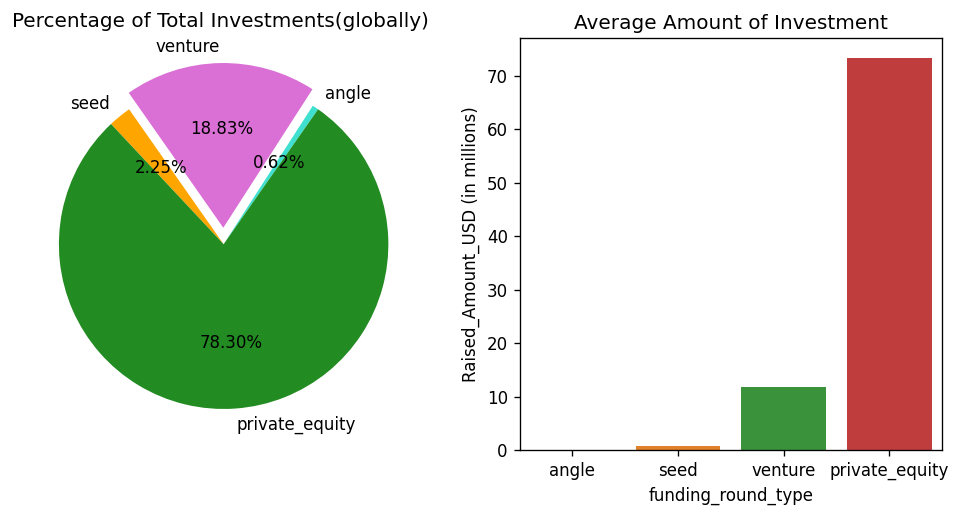

In [50]:
import seaborn as sns

# subplot 1 - Percentage of Total Investments(globally)
plt.figure(figsize=[10.0,10.0],dpi=120,edgecolor='c',frameon=True)
plt.subplot(221)
plt.title('Percentage of Total Investments(globally) ',pad=7)
# Data to plot
labels = 'angle', 'venture', 'seed', 'private_equity'
colors = ['turquoise', 'orchid', 'orange', 'forestgreen']
explode = (0, 0.1, 0, 0) 
# Plot
plt.pie(plot_fundingtype,explode=explode, labels=labels, colors=colors,autopct='%1.2f%%', startangle=55)

# subplot 2 - Average Amount of Investment
plt.subplot(222)
sns.barplot(x=master_frame['funding_round_type'],y=master_frame['raised_amount_usd']/1000000,estimator=np.mean,order=["angle","seed","venture","private_equity"],ci=None)
plt.ylabel("Raised_Amount_USD (in millions)")
plt.title("Average Amount of Investment") 
plt.show()

        
#### From the chart it is evident that `'Venture'` funding type with average investment amount between 5 m to 15 m USD  is best suited for Spark Funds.

-  ### <font color=blue> A plot showing the top 9 countries against the total amount of investments of Venture funding type. 

**_Steps followed:_** <br>
    
1. First I created a new DataFrame - ***'English_Country'*** with Country code and a flag to denote if English is an official language in that country.
2. Then,I merged ***top9*** and ***'English_Country'*** DataFrames on the ***'country_code'*** columns.This will give me the ***'raised_amount_usd'*** details for ***'Venture'*** funding type. 
3. Then,I used a `bar plot` graph to show `Total Investment Amount` (Y-Axis) for `Top 9 Countries` (X-Axis) 

In [51]:
English_Country=pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                        'English_Speaking_Flag': ['Y','N','Y','Y','Y','N','Y','N','N']})
English_Country.head(n=9)

,country_code,English_Speaking_Flag
0,USA,Y
1,CHN,N
2,GBR,Y
3,IND,Y
4,CAN,Y
5,FRA,N
6,ISR,Y
7,DEU,N
8,JPN,N


In [52]:
top9=pd.merge(top9,English_Country,how='inner',on='country_code')
top9.head(n=10)

,country_code,raised_amount_usd,English_Speaking_Flag
0,USA,422510842796.00,Y
1,CHN,39835418773.00,N
2,GBR,20245627416.00,Y
3,IND,14391858718.00,Y
4,CAN,9583332317.00,Y
5,FRA,7259536732.00,N
6,ISR,6907514579.00,Y
7,DEU,6346959822.00,N
8,JPN,3363676611.00,N


    
#### This makes it very clear that the top 3 English speaking countries `USA, GBR, IND` are with highest investment

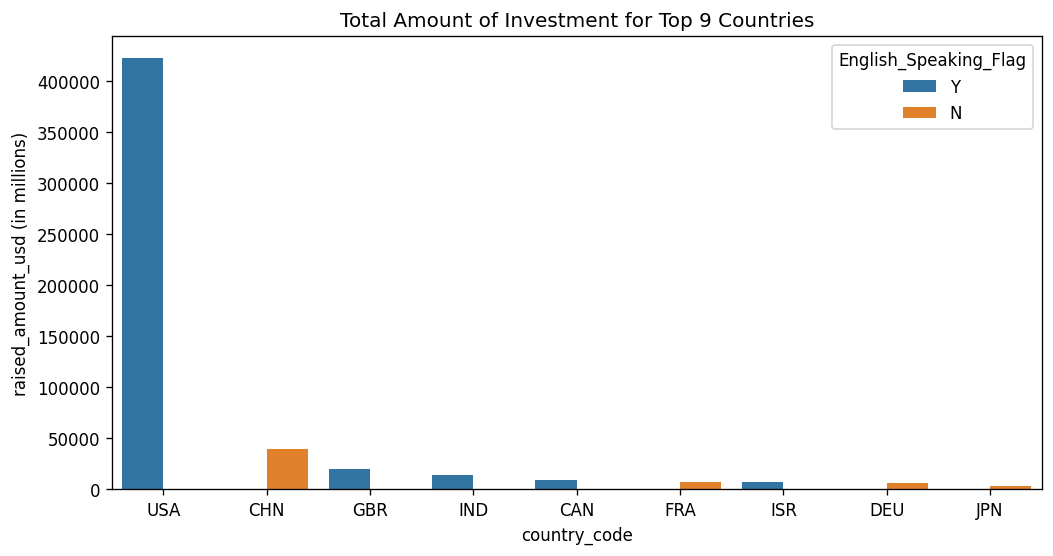

In [53]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x=top9['country_code'],y=top9['raised_amount_usd']/1000000,hue=top9['English_Speaking_Flag'],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Total Amount of Investment for Top 9 Countries") 
plt.show()

-  ### <font color=blue> A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type ***'Venture'***). This plot should clearly display the top 3 sectors each in **USA, GBR and IND**.

  **_Steps followed:_** <br><br>
    _Data Creation:_ <br>
1. First I will be resetting Index of ***'Total_Count_of_Investment'*** DataFrames for top 3 Countries which will help us in plotting the barplot
2. I then filtered out the 3 main sectors by highest Total Investment Count for each Country 
3. A new `Country` Column is added in each Country DataFrame for plotting of sectors and countries
4. Using the ***'merge'*** functionality,I am joining all the 3 country specific DataFrames.This will give us the top 3 sectors for ***USA,GBR and IND***
    
    _Plotting:_
5. Used a `bivariate bar plot` graph to show `Total Investment Count` (Y-Axis) for `Top 3 Countries` (X-Axis) with hue as `Main-Sector`

In [54]:
Total_Count_of_Investment_USA.reset_index(inplace=True)
Total_Count_of_Investment_GBR.reset_index(inplace=True)
Total_Count_of_Investment_IND.reset_index(inplace=True)

In [55]:
Total_Count_of_Investment_USA = Total_Count_of_Investment_USA.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
Total_Count_of_Investment_USA['Country'] = 'USA'
Total_Count_of_Investment_GBR = Total_Count_of_Investment_GBR.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
Total_Count_of_Investment_GBR['Country'] = 'GBR'
Total_Count_of_Investment_IND = Total_Count_of_Investment_IND.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
Total_Count_of_Investment_IND['Country'] = 'IND'

In [56]:
Total_Count_of_Investment=pd.merge(pd.merge(Total_Count_of_Investment_USA,Total_Count_of_Investment_GBR,how='outer'),Total_Count_of_Investment_IND,how='outer')
Total_Count_of_Investment.head(n=10)

,main_sector,Total_Investment_Count,Country
0,Others,8763,USA
1,Cleantech / Semiconductors,8268,USA
2,"Social, Finance, Analytics, Advertising",7822,USA
3,Others,580,GBR
4,"Social, Finance, Analytics, Advertising",481,GBR
5,Cleantech / Semiconductors,466,GBR
6,Others,332,IND
7,"Social, Finance, Analytics, Advertising",193,IND
8,"News, Search and Messaging",154,IND


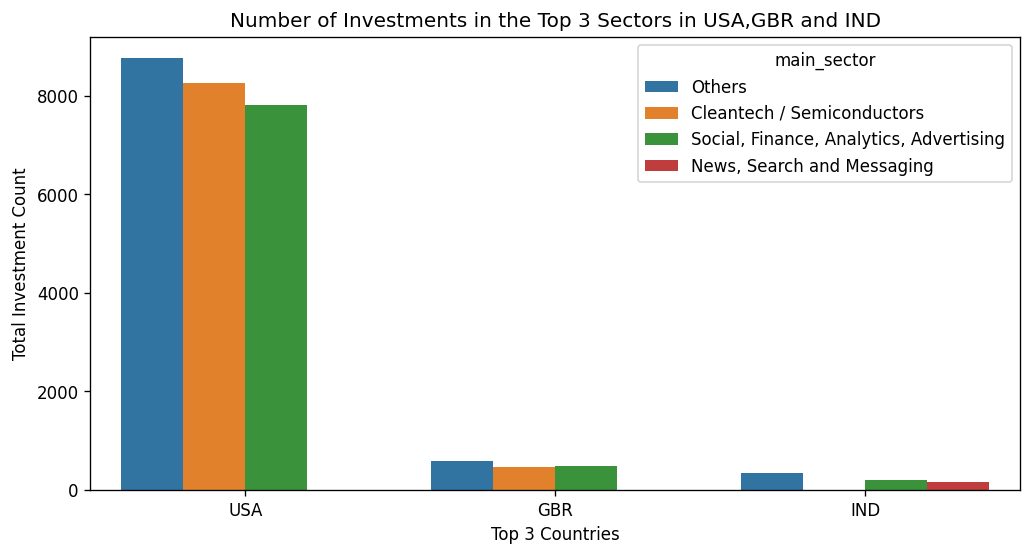

In [57]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x='Country', y='Total_Investment_Count', hue='main_sector',data=Total_Count_of_Investment)
plt.ylabel("Total Investment Count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments in the Top 3 Sectors in USA,GBR and IND") 
plt.show()